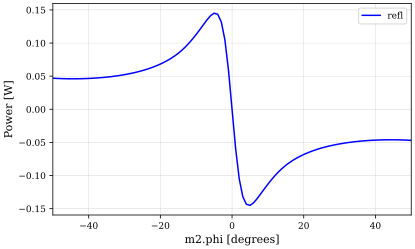

In [1]:
#Task 1: Plot the PDH error signal for the cavity
#Plot the photodiode output as a function of the tuning of mirror M2 in the range -50 to +50 degrees.
import finesse
finesse.configure(plotting=True)
model=finesse.Model()
model.parse(
    """
    laser l1 P=1 f=0
    space s1 portA=l1.p1 portB=mod1.p1
    modulator mod1 80M 0.3 order=3
    space s2 portA=mod1.p2 portB=m1.p1
    mirror m1 R=0.85 T=0.15
    space s3 portA=m1.p2 portB=m2.p1 L=1
    mirror m2 R=0.85 T=0.15
    pd1  refl m1.p1.o f=80M phase=0 
    xaxis(m2.phi, lin, -50, 50, 100)
    """
)
out=model.run()
model.run().plot();

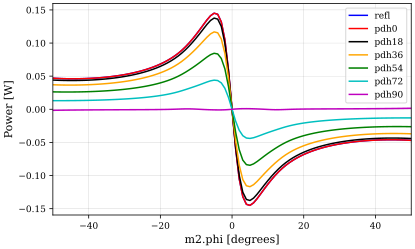

In [2]:
#optimising the demodulation phase
import finesse
import numpy as np
finesse.configure(plotting=True)
model=finesse.Model()
model.parse(
    """
    laser l1 P=1 f=0
    space s1 portA=l1.p1 portB=mod1.p1
    modulator mod1 80M 0.3 order=3
    space s2 portA=mod1.p2 portB=m1.p1
    mirror m1 R=0.85 T=0.15
    space s3 portA=m1.p2 portB=m2.p1 L=1
    mirror m2 R=0.85 T=0.15
    pd1  refl m1.p1.o f=80M phase=0 
    xaxis(m2.phi, lin, -50, 50, 100)
    """
)

for phase in np.linspace(0, 90, endpoint=True, num=6):
    model.parse(f"pd1 pdh{phase:.0f} node=m1.p1.o f=mod1.f phase={phase:.0f}")
    model.parse("xaxis(m2.phi, lin, -50, 50, 100)")
out=model.run()
model.run().plot();

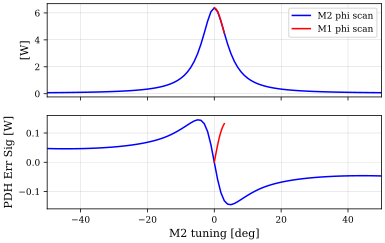

In [3]:
###  Task 2: Plot the circulating power and PDH error signal for multiple M1 tunings
import finesse
import matplotlib.pyplot as plt
import numpy as np

finesse.configure(plotting=True)
model = finesse.Model()
model.parse(
    """
    laser l1 P=1 f=0
    space s1 portA=l1.p1 portB=mod1.p1
    modulator mod1 80M 0.3 order=3
    space s2 portA=mod1.p2 portB=m1.p1
    mirror m1 R=0.85 T=0.15
    space s3 portA=m1.p2 portB=m2.p1 L=1
    mirror m2 R=0.85 T=0.15
    power_detector_demod_1 refl m1.p1.o f=80M phase=0 
    pd circ m2.p1.i 
    xaxis(m2.phi, lin, -50, 50, 100)
    """
)
out = model.run()

# Convert to numpy arrays and flatten
x = np.array(out.x).flatten()

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(x, out['circ'], label="M2 phi scan")
ax[0].set_ylabel('[W]')
ax[1].plot(x, out['refl'])
ax[1].set_ylabel('PDH Err Sig [W]')
ax[1].set_xlabel('M2 tuning [deg]')

model1 = model.deepcopy()
model1.parse(
    """
    xaxis(m1.phi, lin, 0, 3, 10)
    """
)
out1 = model1.run()

# Convert to numpy arrays and flatten
x1 = np.array(out1.x).flatten()

ax[0].plot(x1, out1['circ'], label="M1 phi scan")
ax[1].plot(x1, out1['refl'])
ax[0].legend()
plt.show()


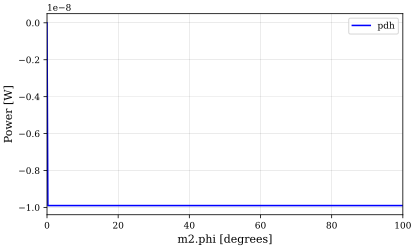

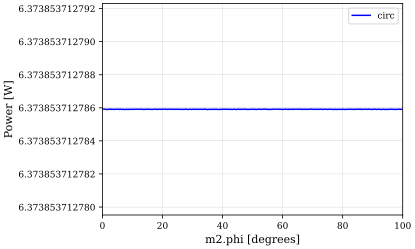

In [5]:
##Task 3: set up a FP cavity that is locked so that the input mirror follows the end mirror
import finesse
import matplotlib.pyplot as plt
import numpy as np

finesse.configure(plotting=True)
model = finesse.Model()
model.parse(
    """
    laser l1 P=1 f=0
    space s1 portA=l1.p1 portB=mod1.p1
    modulator mod1 80M 0.3 order=3
    space s2 portA=mod1.p2 portB=m1.p1
    mirror m1 R=0.85 T=0.15
    space s3 portA=m1.p2 portB=m2.p1 L=1
    mirror m2 R=0.85 T=0.15
    power_detector_demod_1 pdh m1.p1.o f=80M phase=3
    pd circ m2.p1.i 
    lock lock_length pdh m1.phi -1 10n
   xaxis(m2.phi, lin, 0, 100, 400, pre_step=run_locks())
    """
)
model.run().plot();